# Exploratory Data Analysis
### Steps:
- Importing Data
- Understanding the data
- Cleaning the Data
  - Extra Columns
  - Missing Values
  - Handling Outliers
- Univariate Analysis
  - Numerical Variables
  - Categorical Variables
- Multivariate Analysis
- Conclusion

#### 1. Importing Libraries and Data

In [101]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
#reading the dataset
df=pd.read_csv('titanic.csv')
#checking the shape of the dataset
df.shape

(891, 16)

#### 2. Understanding the Data

In [103]:
#checking the first 5 rows of the dataset
df.head(15)

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [104]:
#checking the last 5 rows of the dataset
df.tail()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [105]:
#checking the columns of the dataset
df.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [106]:
#checking the datatypes of the columns
df.dtypes

Unnamed: 0       int64
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [107]:
#basic statistics of the dataset
df.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 3. Cleaning the Data
1. Extra Columns

As unnamed column is not required, we will be dropping it.

In [108]:
df.drop('Unnamed: 0',axis=1,inplace=True)

survived and alive are same columns, so we will be dropping one of them.

In [109]:
df.drop('alive',axis=1,inplace=True)

We will merge sibsp and parch columns to create a new column called family_size which will give us the total number of family members on board.

In [110]:
#merge the sibsp and parch columns
df['family_size']=df['sibsp']+df['parch']

shifting the columns to get a better understanding of the data set.

In [111]:
#shifting the index of fare column next to age column
fare_col=df['fare']
df.drop('fare',axis=1,inplace=True)
df.insert(4,'fare',fare_col)

In [112]:
#shift the index of family size column next to parch column
family_col=df['family_size']
df.drop('family_size',axis=1,inplace=True)
df.insert(7,'family_size',family_col)

Checking the updated data set.

In [113]:
#checking the updated dataset
df.head()

,survived,pclass,sex,age,fare,sibsp,parch,family_size,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,7.2500,1,0,1,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,71.2833,1,0,1,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,7.9250,0,0,0,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,53.1000,1,0,1,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,8.0500,0,0,0,S,Third,man,True,NaN,Southampton,True


2. Missing Values

In [114]:
#checking the null values in the dataset
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
fare             0
sibsp            0
parch            0
family_size      0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

Removing the deck column as it has a lot of missing values.

In [115]:
df.drop('deck',axis=1,inplace=True)

as fare,embarked and embarked_town have very few missing values, we will be dropping those rows.

In [116]:
#drop the rows with null values
df.dropna(subset=['embark_town','embarked','fare'],axis=0,inplace=True)

In [117]:
#checking the null values in the dataset
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
fare             0
sibsp            0
parch            0
family_size      0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alone            0
dtype: int64

In [118]:
#filling the null values in the age column with mean
df['age'].fillna(df['age'].mean(),inplace=True)

In [119]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
fare           0
sibsp          0
parch          0
family_size    0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

#### 4. Univariate Analysis

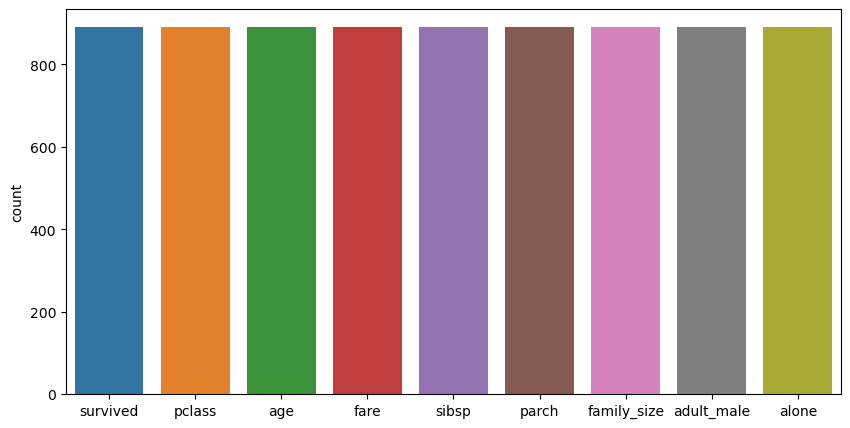

In [120]:
#univariate analysis
#plotting the
plt.figure(figsize=(10,5))
sns.countplot(data=df)
plt.show()

<AxesSubplot:ylabel='survived'>

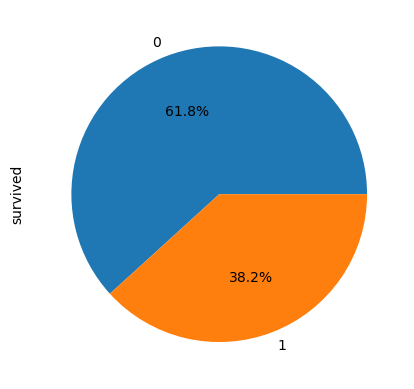

In [121]:
#pie chart
df.survived.value_counts().plot.pie(autopct='%1.1f%%')

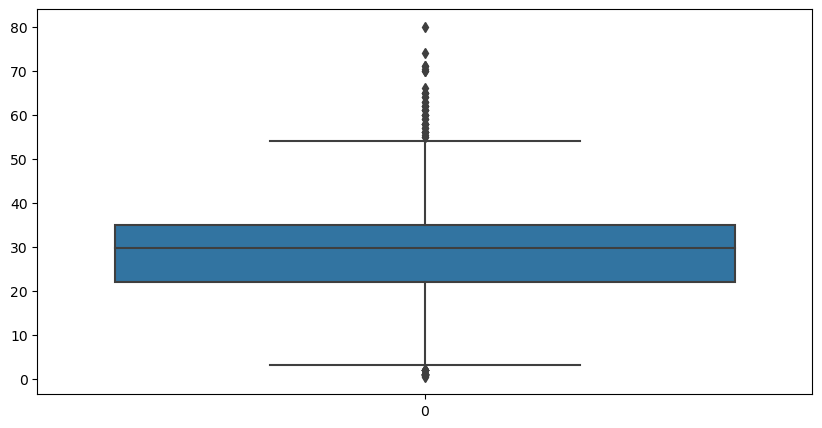

In [122]:
#checking for the outliers in age column
plt.figure(figsize=(10,5))
sns.boxplot(data=df['age'])
plt.show()

In [123]:
df=df[df['age']<70]

<AxesSubplot:>

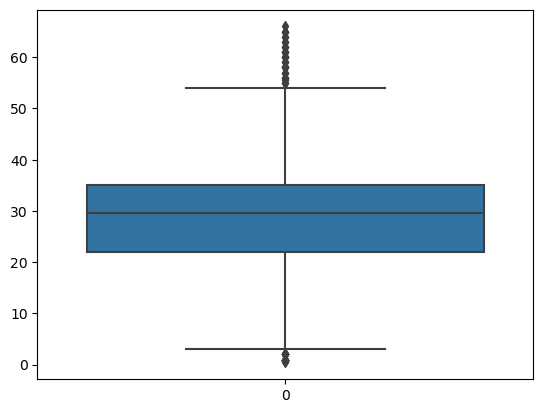

In [124]:
sns.boxplot(data=df['age'])

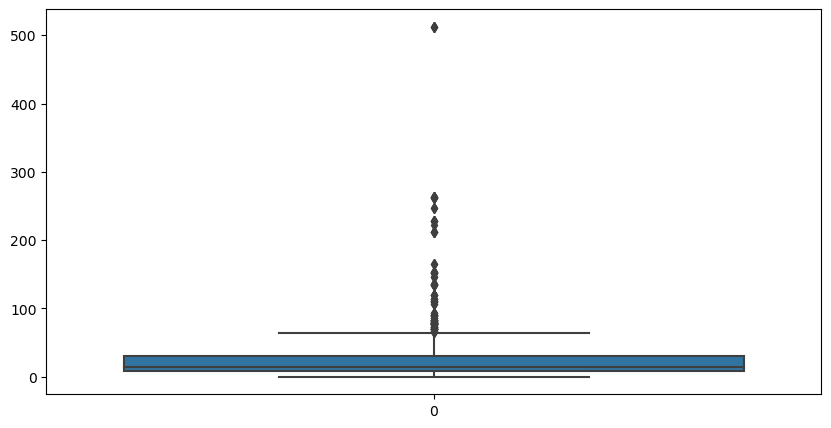

In [125]:
#checking for the outliers in fare column
plt.figure(figsize=(10,5))
sns.boxplot(data=df['fare'])
plt.show()

In [126]:
#using the IQR method to remove the outliers
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['fare']>=Q1-1.5*IQR) & (df['fare']<=Q3+1.5*IQR)]

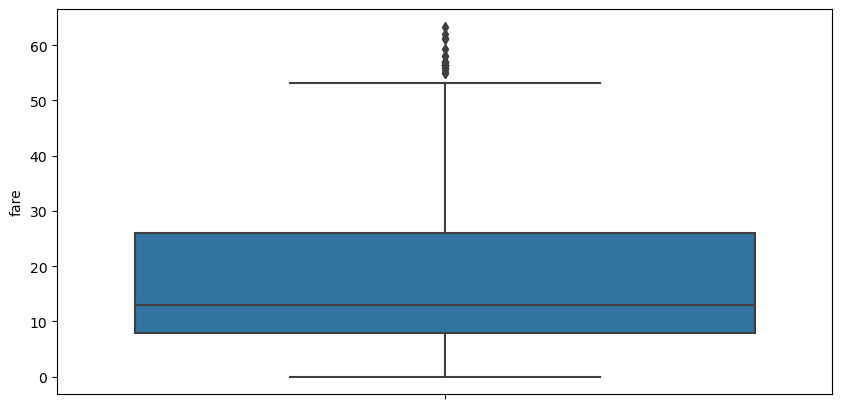

In [127]:
#checking for the outliers in fare column
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='fare')
plt.show()

#### 5. Multivariate Analysis

<AxesSubplot:xlabel='age', ylabel='fare'>

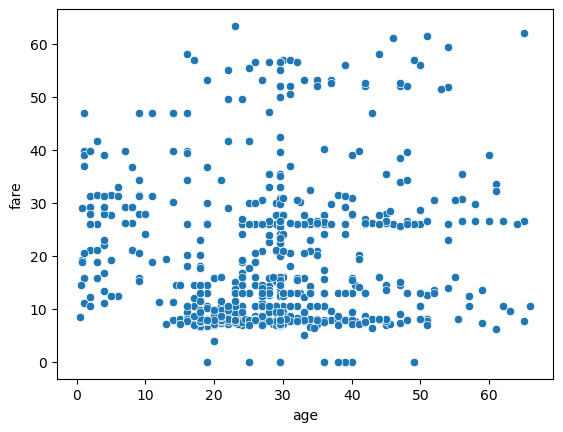

In [128]:
#numerical data analysis
#scatter plot
sns.scatterplot(data=df,x='age',y='fare')

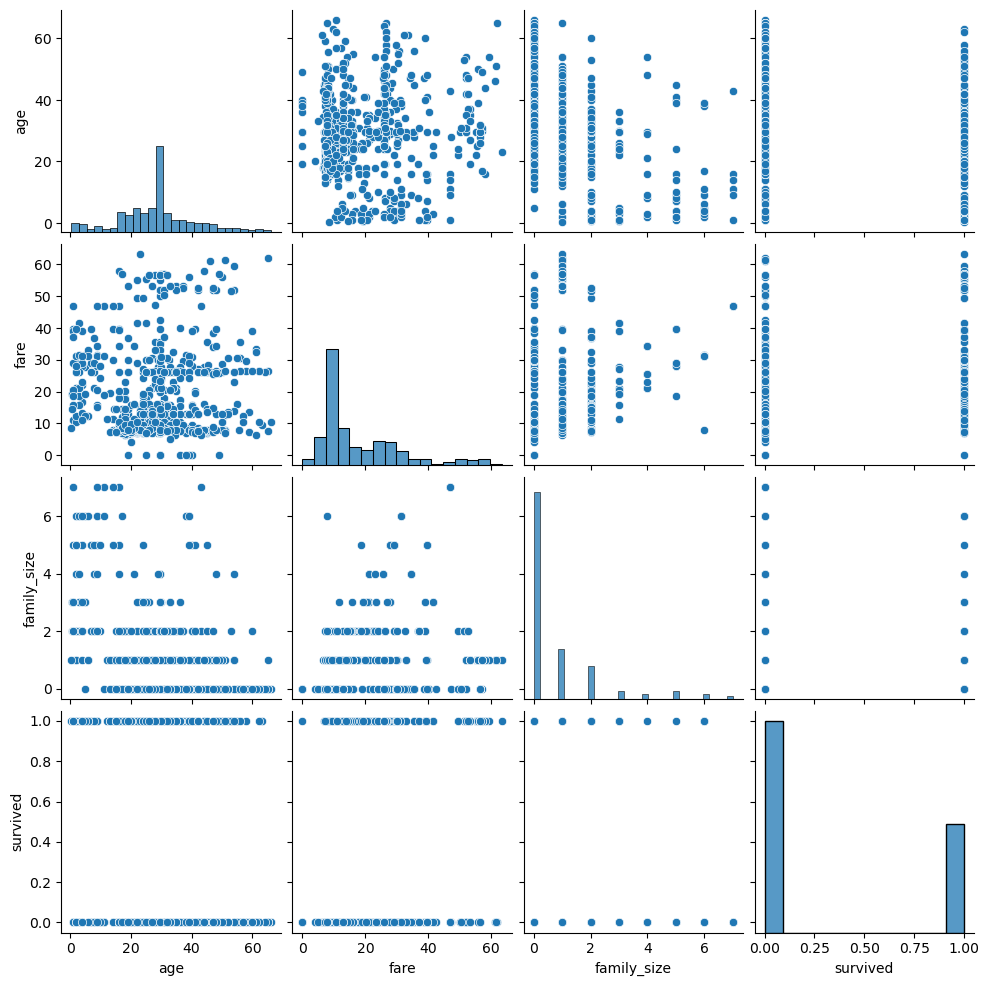

In [129]:
#pair plot
sns.pairplot(data=df,vars=['age','fare','family_size','survived'])

<AxesSubplot:>

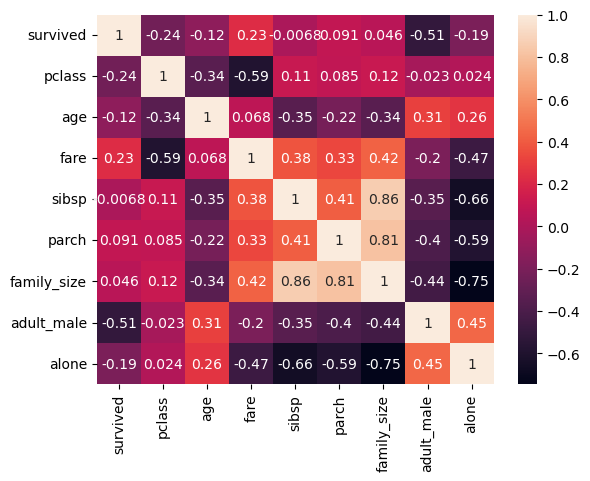

In [130]:
#correlation matrix
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='pclass', ylabel='survived'>

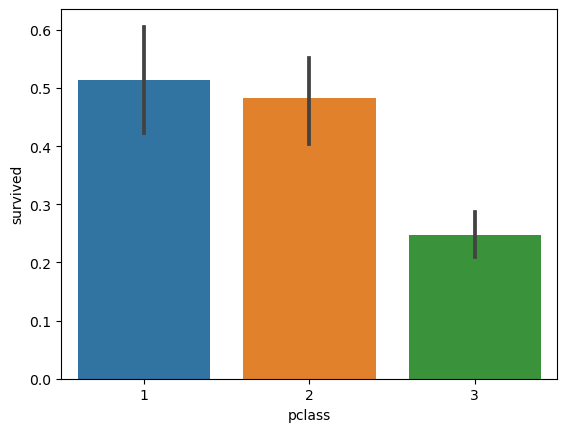

In [131]:
#catorgorical data analysis
sns.barplot(data=df,x='pclass',y='survived')

<AxesSubplot:xlabel='pclass', ylabel='count'>

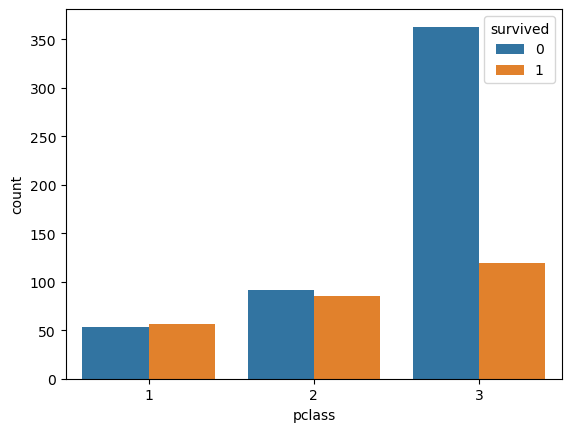

In [132]:
#category vs category
sns.countplot(data=df,x='pclass',hue='survived')

<AxesSubplot:xlabel='pclass', ylabel='fare'>

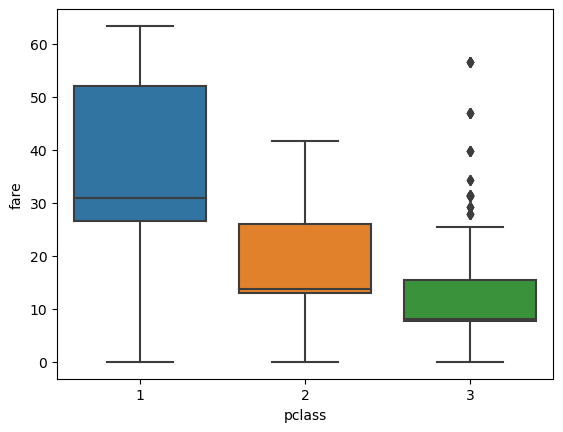

In [133]:
#fare and pclass
sns.boxplot(data=df,x='pclass',y='fare')

#### 6. Conclusion
We have successfully completed the Exploratory Data Analysis of the titanic dataset and have gained a lot of insights from the data. We have also cleaned the data and have created a new column called family_size which will help us in further analysis of the data. We have also removed the columns which were not required for our analysis. We have also removed the rows which had missing values. We have also handled the outliers in the data. We have also done the univariate and multivariate analysis of the data. Visualizations have been used to understand the data better. We have also used the groupby function to get a better understanding of the data.